<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/9-unsupervised-learning-techniques/simple_kmeans_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Kmeans example

We have taken its reference from this course.

[ECE 20875: Python for Data Science](https://www.cbrinton.net/ECE20875-2020-Spring.html)

1. [Clustering: kMeans](https://www.cbrinton.net/ECE20875-2020-Spring/W11/clustering.pdf)
2. [Notebook](https://www.cbrinton.net/ECE20875-2020-Spring/W11/kmeans_notebook.pdf)

##Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

##Dataset

In [2]:
X = np.array([
    [5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,45],
    [85,70],
    [71,80],
    [60,78],
    [55,52],
    [80,91]           
])

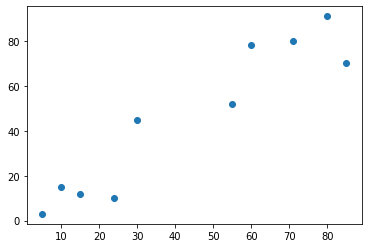

In [3]:
plt.scatter(X[:, 0], X[:, 1])

##kMeans algorithm

In [5]:
#Fitting the kMeans algorithm with k=2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# get the centroids
print(kmeans.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


In [6]:
# get all labels
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0]


Now, let's build a function that will color the datapoints in $X$ according to where they were clustered by `kmeans`, and plot the `centroids`.

In [15]:
def  plot_kmeans(X, kmeans, ax=None):
  if ax is None:
    ax = plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="rainbow")
  centers = kmeans.cluster_centers_
  ax.scatter(centers[:, 0], centers[:, 1], c=np.arange(centers.shape[0]), marker="x", s=100, cmap="rainbow")

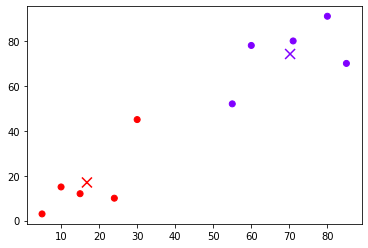

In [16]:
plot_kmeans(X, kmeans)

In [11]:
# get first centroids
kmeans.cluster_centers_[0]

array([70.2, 74.2])

In [12]:
# get second centroids
kmeans.cluster_centers_[1]

array([16.8, 17. ])

Now let's change `kmeans` to use `k=5` clusters instead of `k=2`

In [17]:
#Fitting the kMeans algorithm with k=5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# get the centroids
print(kmeans.cluster_centers_)

[[13.5 10. ]
 [82.5 80.5]
 [55.  52. ]
 [30.  45. ]
 [65.5 79. ]]


In [18]:
#get all labels
print(kmeans.labels_)

[0 0 0 0 3 1 4 4 2 1]


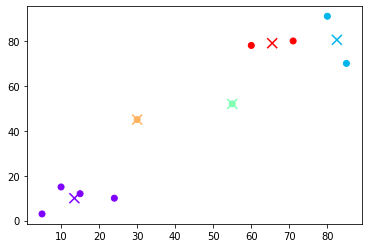

In [19]:
plot_kmeans(X, kmeans)

The result looks overfitted, with two of the clusters only having one datapoint each. 

Thus we need to be careful in our choice of $k$!


## kMeans algorithm progression

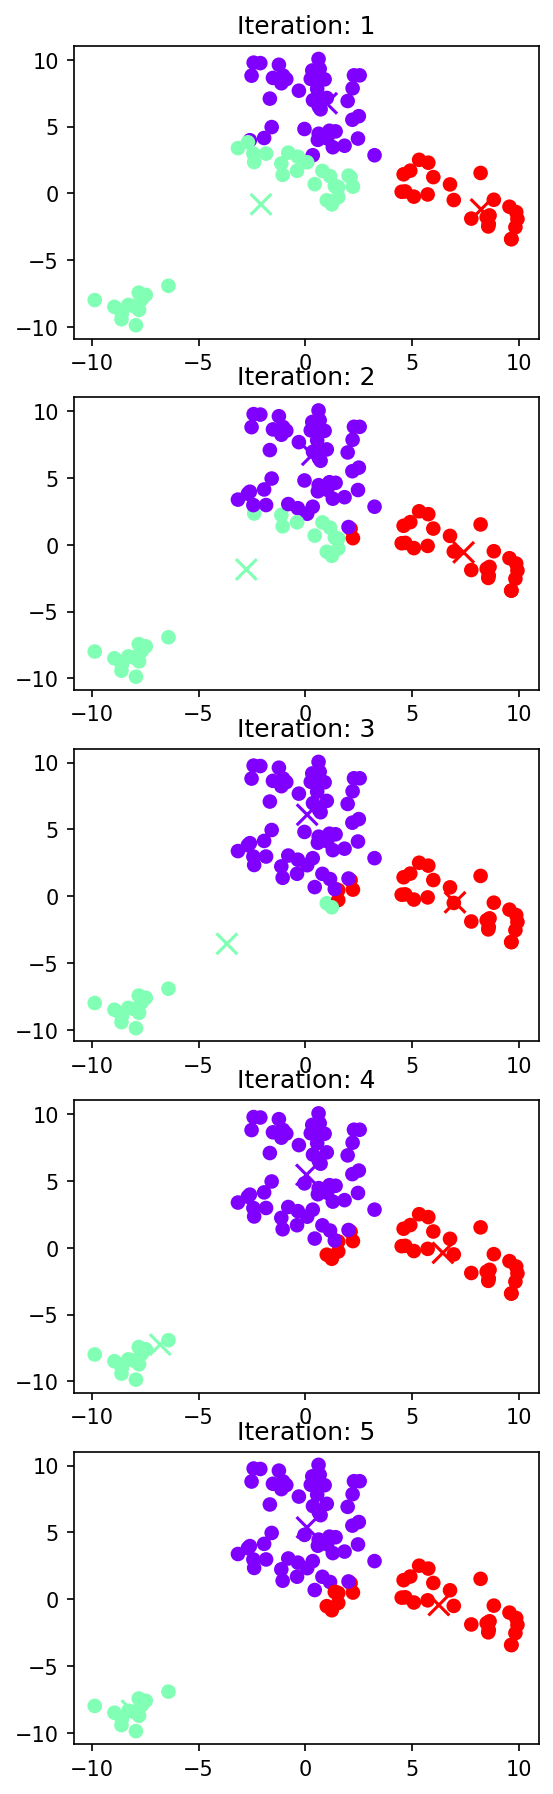

In [20]:
X2, _ = make_blobs(centers=8, random_state=0)

# Setup plots
show_iters = np.arange(5) + 1
_, axes = plt.subplots(len(show_iters), 1, figsize=(4, 3 * len(show_iters)), dpi=150)

# Show plot for each iteration
for max_iter, ax in zip(show_iters, axes):
  kmeans = KMeans(n_clusters=3, max_iter=max_iter, n_init=1, init="random", random_state=0)
  kmeans.fit(X2)
  plot_kmeans(X2, kmeans, ax=ax)
  ax.set_title(f"Iteration: {max_iter}")

##Clustering optimal solution

Clustering may not converge to optimal solution.

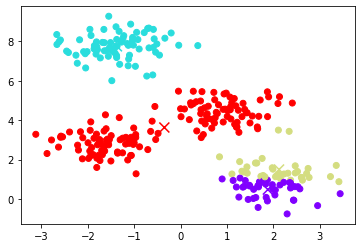

In [21]:
X2, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, n_init=1, init="random", random_state=104) # 104 gives bad seeding
kmeans.fit(X2)
plot_kmeans(X2, kmeans)

##The number of clusters

Choosing the number of clusters is not obvious.

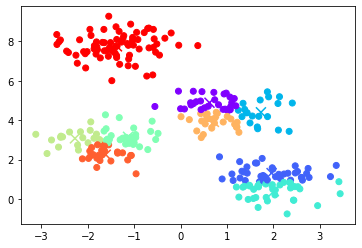

In [22]:
X2, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=9, n_init=1, init="random", random_state=0) 
kmeans.fit(X2)
plot_kmeans(X2, kmeans)

##Motivation for GMMs

Axis scaling matters for `k-means` (one motivation for GMMs)

(-7.6695009915020105,
 38.84428241167275,
 -1.2536474338023191,
 5.866108305124282)

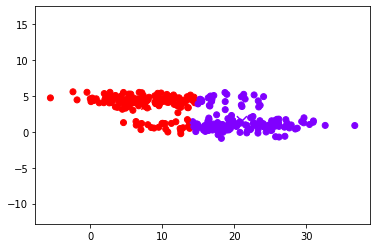

In [23]:
X3, y_true = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

X3[:, 0] = X3[:, 0] * 10

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X3)
plot_kmeans(X3, kmeans)
plt.axis("equal")

In [24]:
np.arange(kmeans.cluster_centers_.shape[0])

array([0, 1])